In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0

TensorFlow 1.x selected.
     |████████████████████████████████| 2.9 MB 5.2 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [ ]:
!wget https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
!unzip Mask_RCNN_basic_1.zip

--2022-04-24 03:12:41--  https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
Resolving pysource.com (pysource.com)... 104.21.67.193, 172.67.180.33, 2606:4700:3031::6815:43c1, ...
Connecting to pysource.com (pysource.com)|104.21.67.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1282557 (1.2M) [application/zip]
Saving to: ‘Mask_RCNN_basic_1.zip’

Mask_RCNN_basic_1.z 100%[===================>]   1.22M  --.-KB/s    in 0.06s   

2022-04-24 03:12:42 (22.0 MB/s) - ‘Mask_RCNN_basic_1.zip’ saved [1282557/1282557]

Archive:  Mask_RCNN_basic_1.zip
   creating: Mask_RCNN/
  inflating: Mask_RCNN/.gitignore    
   creating: Mask_RCNN/assets/
   creating: Mask_RCNN/images/
  inflating: Mask_RCNN/LICENSE       
  inflating: Mask_RCNN/MANIFEST.in   
   creating: Mask_RCNN/mrcnn/
  inflating: Mask_RCNN/mrcnn/config.py  
  inflating: Mask_RCNN/mrcnn/model.py  
  inflating: Mask_RCNN/mrcnn/m_rcnn.py  
  inflating: Mask_RCNN/mrcnn/parallel_model.py  
  inflating: Mask_RCNN

In [ ]:
import sys
sys.path.append("/content/Mask_RCNN/mrcnn")
from m_rcnn import *
%matplotlib inline

VERS 0.2


Using TensorFlow backend.


... done downloading pretrained model!


In [ ]:
!nvidia-smi

Sun Apr 24 03:12:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    12W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
annotations_path = "drive/Shareddrives/NN_Project/NN_Final/SortedClasses/metal_annotated.json"

In [ ]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/drive/Shareddrives/NN_Project/NN_Final/SortedClasses/combined_images/", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/drive/Shareddrives/NN_Project/NN_Final/SortedClasses/combined_images/", "val")
class_number = dataset_train.count_classes()

Annotation json path:  /content/drive/Shareddrives/NN_Project/NN_Final/SortedClasses/metal_annotated.json
Annotation json path:  /content/drive/Shareddrives/NN_Project/NN_Final/SortedClasses/metal_annotated.json


In [ ]:
print('Train: %d' % len(dataset_train.image_ids))

Train: 73


In [ ]:
print('Validation: %d' % len(dataset_val.image_ids))

Validation: 9


In [ ]:
print("Classes: {}".format(class_number))

Classes: 1


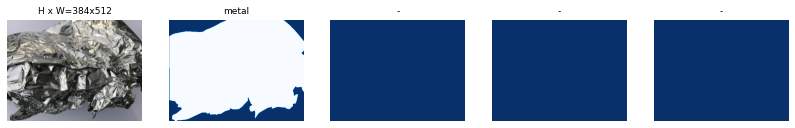

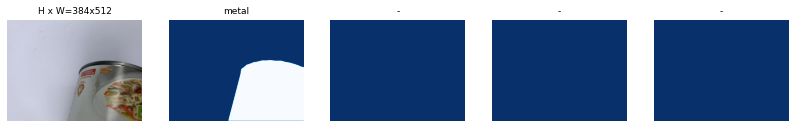

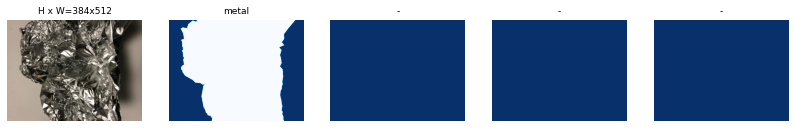

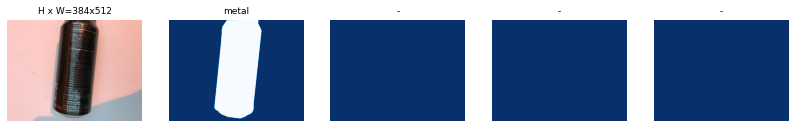

In [ ]:
# Load image samples
display_image_samples(dataset_train)

# Training Mask RCNN model

In [ ]:
# Load Configuration
config = CustomConfig(class_number)
#config.display()
model = load_training_model(config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead
/content/Mask_RCNN/mask_rcnn_coco.h5


In [ ]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/Mask_RCNN/logs/object20220424T0313/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn

# Test on random image

In [ ]:
# Load Test Model
# The latest trained model will be loaded
test_model, inference_config = load_test_model(class_number)



Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/Mask_RCNN/logs/object20220424T0313/mask_rcnn_object_0005.h5
Re-starting from epoch 5


original_image           shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


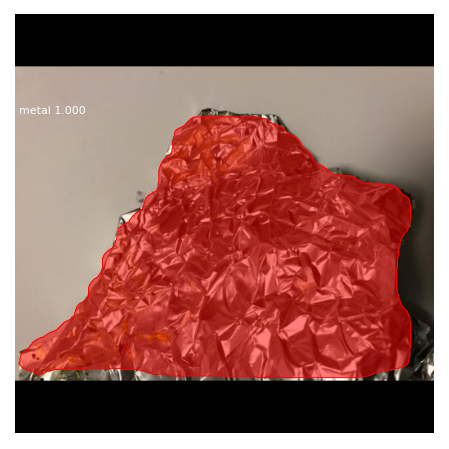

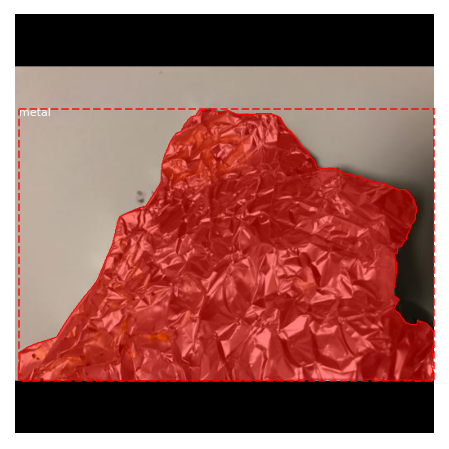

In [ ]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)